## Fun with elastic bounds

This notebook exercise reproduces Figure 2.1 in Mavko et al's Rock Physics Handbook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from bruges.rockphysics import bounds as b
%matplotlib inline

## The page from the book
![caption](images/Mavko_RPH_Fig2_1.jpg)

### Let's turn it into a Pandas DataFrame

In [2]:
data = {'Bulk Modulus [GPa]': [36.6, 21.0, 75.6, 76.8, 94.9],
        'Shear Modulus [GPa]': [45.9, 7.0, 25.6, 32.0, 45.0],
        'Density [g/cm3]': [2650, 2580, 2630, 2710, 2870]}

minerals = pd.DataFrame(data, columns=['Bulk Modulus [GPa]', 'Shear Modulus [GPa]', 'Density [kg/m3]'],
                       index=['Quartz', 'Clay', 'Feldspar', 'Calcite', 'Dolomite'])
minerals

,Bulk Modulus [GPa],Shear Modulus [GPa],Density [kg/m3]
Quartz,36.6,45.9,NaN
Clay,21.0,7.0,NaN
Feldspar,75.6,25.6,NaN
Calcite,76.8,32.0,NaN
Dolomite,94.9,45.0,NaN


In [3]:
minerals['Bulk Modulus [GPa]']['Calcite']

76.799999999999997

Create a range of Vclay values to represent the domain of the mixing bounds,

In [4]:
vclay = np.arange(0,1,0.01)

In [5]:
k1 = minerals['Bulk Modulus [GPa]']['Clay']
k2 = minerals['Bulk Modulus [GPa]']['Calcite']
g1 = minerals['Shear Modulus [GPa]']['Clay']
g2 = minerals['Shear Modulus [GPa]']['Calcite']
d1 = minerals['Density [kg/m3]']['Clay']
d2 = minerals['Density [kg/m3]']['Calcite']

## Bulk Modulus Bounds

In [6]:
kv, kr, kh, khsu, khsl = [], [], [], [], []
for i in vclay:
    kv.append(b.voigt_bound([i,1.0-i],[k1,k2]))
    kr.append(b.reuss_bound([i,1.0-i],[k1,k2]))
    kh.append(b.hill_average([i,1.0-i],[k1,k2]))
    khsu.append(b.hashin_shtrikman([i,1.0-i],[k1,k2],[g1, g2], bound='upper', moduli='bulk'))
    khsl.append(b.hashin_shtrikman([1.0-i,i],[k2,k1],[g2, g1], bound='lower', moduli='bulk'))

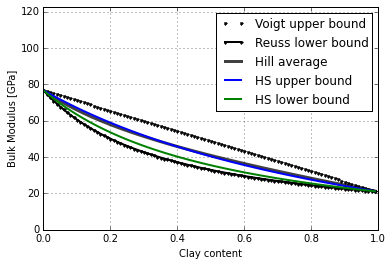

In [7]:
ymax = np.amax(kv)*1.60
ymin = 0
plt.plot(vclay, kv, 'k.', lw=2, label='Voigt upper bound')
plt.plot(vclay, kr, 'k.-', lw=2, label='Reuss lower bound')
plt.plot(vclay, kh, 'k', alpha=0.75, lw=3, label='Hill average')
plt.plot(vclay, khsu, lw=2,label='HS upper bound')
plt.plot(vclay, khsl, lw=2, label='HS lower bound')
plt.xlabel('Clay content')
plt.ylabel('Bulk Modulus [GPa]')
plt.ylim((ymin,ymax))
plt.legend()
plt.grid()
plt.show()

## Shear Modulus bounds

In [8]:
gv, gr, gh, ghsu, ghsl = [], [], [], [], []
for i in vclay:
    gv.append(b.voigt_bound([i,1.0-i],[g1,g2]))
    gr.append(b.reuss_bound([i,1.0-i],[g1,g2]))
    gh.append(b.hill_average([i,1.0-i],[g1,g2]))
    ghsu.append(b.hashin_shtrikman([i,1.0-i],[k1,k2],[g1, g2], bound='upper', moduli='shear'))
    ghsl.append(b.hashin_shtrikman([1.0-i,i],[k2,k1],[g2, g1], bound='lower', moduli='shear'))

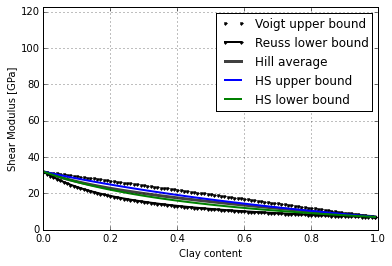

In [9]:
plt.plot(vclay, gv, 'k.', lw=2, label='Voigt upper bound')
plt.plot(vclay, gr, 'k.-', lw=2, label='Reuss lower bound')
plt.plot(vclay, gh, 'k', alpha=0.75, lw=3, label='Hill average')
plt.plot(vclay, ghsu, lw=2,label='HS upper bound')
plt.plot(vclay, ghsl, lw=2, label='HS lower bound')
plt.xlabel('Clay content')
plt.ylabel('Shear Modulus [GPa]')
plt.ylim((ymin,ymax))
plt.legend()
plt.grid()
plt.show()

## Compressional Modulus bounds

Compressional (P-wave) modulus, M, is defined as,

$ M = K + \frac{4}{3}G\ $

where <i>K</i> is the Bulk Modulus and <i>G</i> is the Shear Modulus.

In [10]:
mv, mr, mh, mhsu, mhsl = [], [], [], [], []
m1 = k1 + (4.0/3.0)*g1 
m2 = k2 + (4.0/3.0)*g2

for i in vclay:
    mv.append(b.voigt_bound([i,1.0-i],[m1,m2]))
    mr.append(b.reuss_bound([i,1.0-i],[m1,m2]))
    mh.append(b.hill_average([i,1.0-i],[m1,m2]))

mhsu = np.array(khsu) + (4.0/3.0)*np.array(ghsu)
mhsl = np.array(khsl) + (4.0/3.0)*np.array(ghsl)

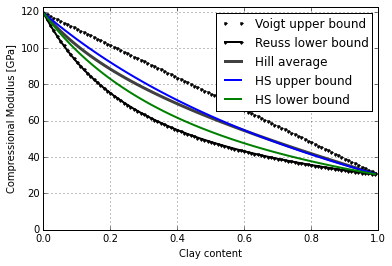

In [11]:
plt.plot(vclay, mv, 'k.', lw=2, label='Voigt upper bound')
plt.plot(vclay, mr, 'k.-', lw=2, label='Reuss lower bound')
plt.plot(vclay, mh, 'k', alpha=0.75, lw=3, label='Hill average')
plt.plot(vclay, mhsu, lw=2,label='HS upper bound')
plt.plot(vclay, mhsl, lw=2, label='HS lower bound')
plt.xlabel('Clay content')
plt.ylabel('Compressional Modulus [GPa]')
plt.ylim((ymin,ymax))
plt.legend()
plt.grid()
plt.show()

## Make the composite 3 panel figure

/Users/Evan/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


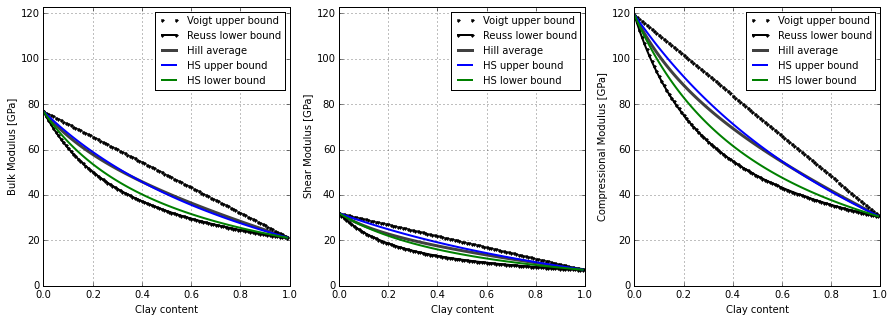

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(15,5))
lgsz = 10  # size of legend

ax1.plot(vclay, kv, 'k.', lw=2, label='Voigt upper bound')
ax1.plot(vclay, kr, 'k.-', lw=2, label='Reuss lower bound')
ax1.plot(vclay, kh, 'k', alpha=0.75, lw=3, label='Hill average')
ax1.plot(vclay, khsu, lw=2,label='HS upper bound')
ax1.plot(vclay, khsl, lw=2, label='HS lower bound')
ax1.set_xlabel('Clay content')
ax1.set_ylabel('Bulk Modulus [GPa]')
ax1.set_ylim((ymin,ymax))
ax1.legend(prop={'size':lgsz})
ax1.grid()

ax2.plot(vclay, gv, 'k.', lw=2, label='Voigt upper bound')
ax2.plot(vclay, gr, 'k.-', lw=2, label='Reuss lower bound')
ax2.plot(vclay, gh, 'k', alpha=0.75, lw=3, label='Hill average')
ax2.plot(vclay, ghsu, lw=2,label='HS upper bound')
ax2.plot(vclay, ghsl, lw=2, label='HS lower bound')
ax2.set_xlabel('Clay content')
ax2.set_ylabel('Shear Modulus [GPa]')
ax2.set_ylim((ymin,ymax))
ax2.legend(prop={'size':lgsz})
ax2.grid()

ax3.plot(vclay, mv, 'k.', lw=2, label='Voigt upper bound')
ax3.plot(vclay, mr, 'k.-', lw=2, label='Reuss lower bound')
ax3.plot(vclay, mh, 'k', alpha=0.75, lw=3, label='Hill average')
ax3.plot(vclay, mhsu, lw=2,label='HS upper bound')
ax3.plot(vclay, mhsl, lw=2, label='HS lower bound')
ax3.set_xlabel('Clay content')
ax3.set_ylabel('Compressional Modulus [GPa]')
ax3.set_ylim((ymin,ymax))
ax3.legend(prop={'size':lgsz})
ax3.grid()

fig.savefig('elastic_moduli_bounds_calcite_clay.PNG')

fig.show()